In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [4]:
df.columns
df.drop(columns=['Unnamed: 0', 'Booking_ID'], inplace= True)


In [5]:
df.shape

df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
#check for duplicate
df.duplicated().sum()
df.drop_duplicates(inplace= True)

In [7]:
df.shape

(21359, 18)

In [8]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [9]:
df[ 'repeated_guest'].value_counts()


repeated_guest
0    20667
1      692
Name: count, dtype: int64

In [10]:
cat_cols = ['type_of_meal_plan','required_car_parking_space', 'room_type_reserved', 'market_segment_type',  'repeated_guest',  'booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

len(cat_cols) + len(num_cols) #should be 18
data = df.copy()

### UNIVARIATE ANALYSIS ###

In [11]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize = (15, len(num_features)*7))
    if len(num_features) == 1:
        axes = [axes]
    for i, column in enumerate(num_features):
        sns.histplot(data= df, x= column, ax = axes[i][0], kde = True, color='purple')
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data = df, x = column, ax = axes[i][1], color= "teal")
        axes[i][1].set_title(f"box plot for {column}")
    plt.tight_layout()
    plt.show()

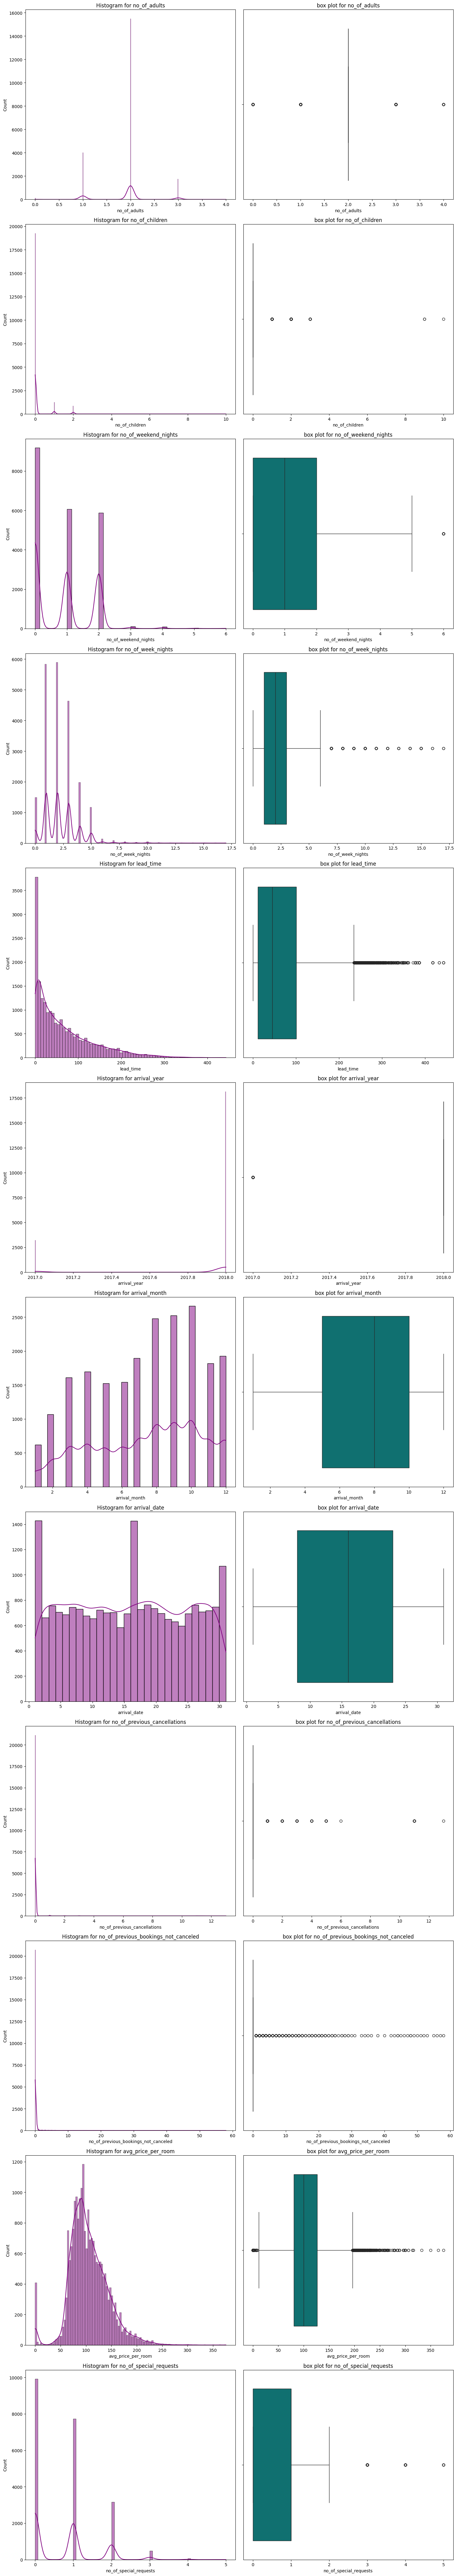

In [12]:
num_plot_dist(data, num_cols)

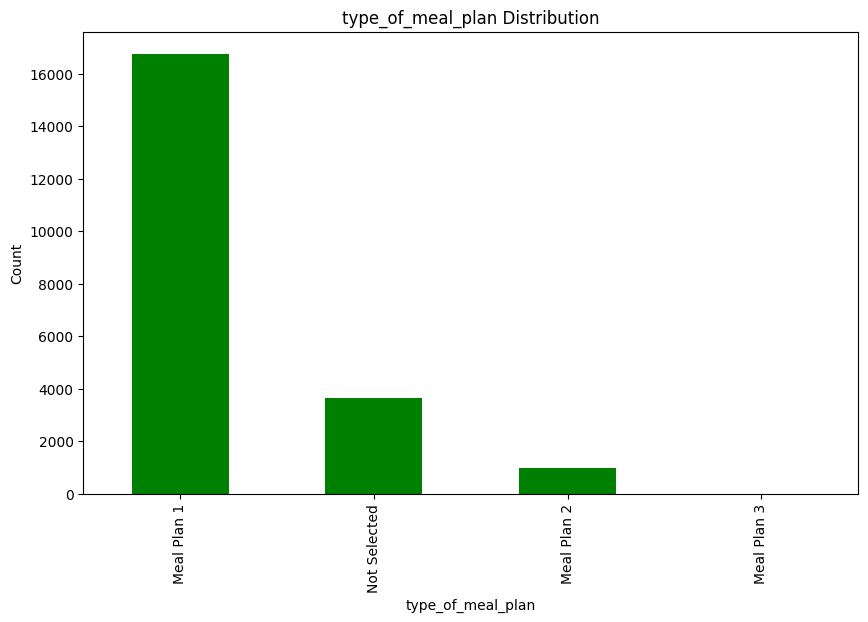

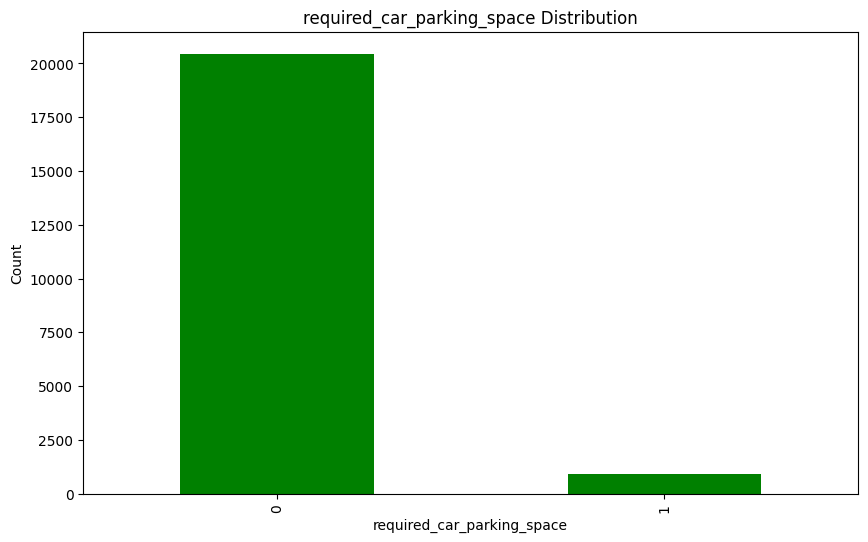

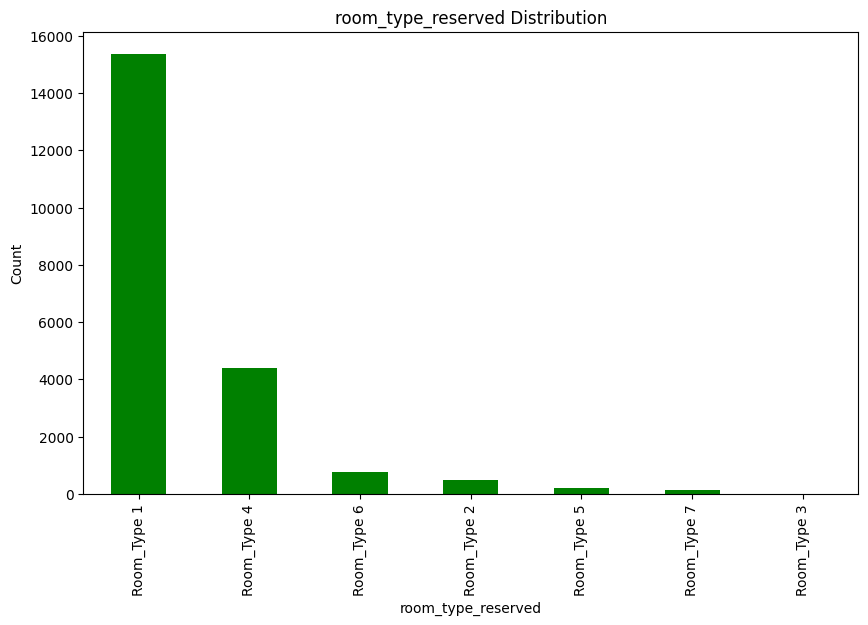

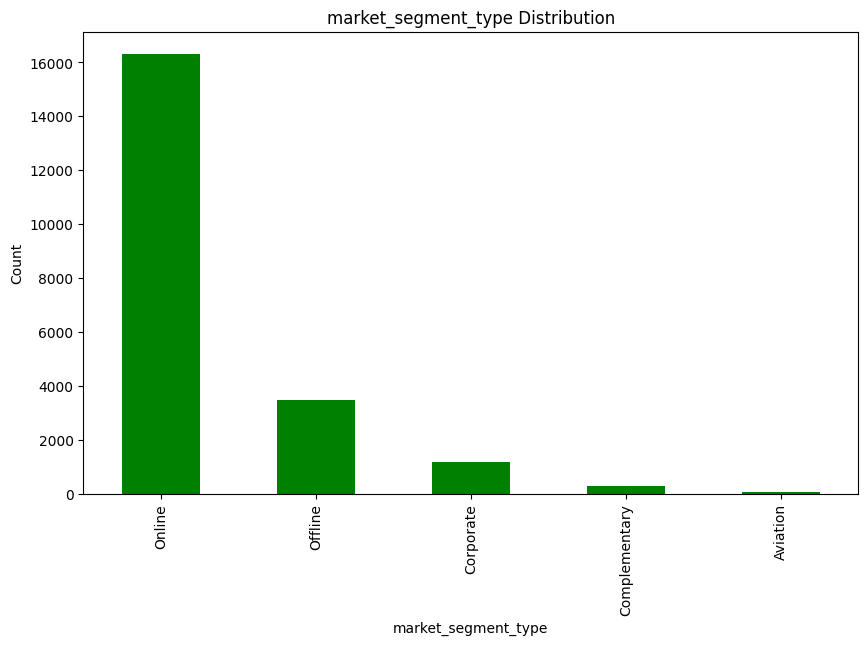

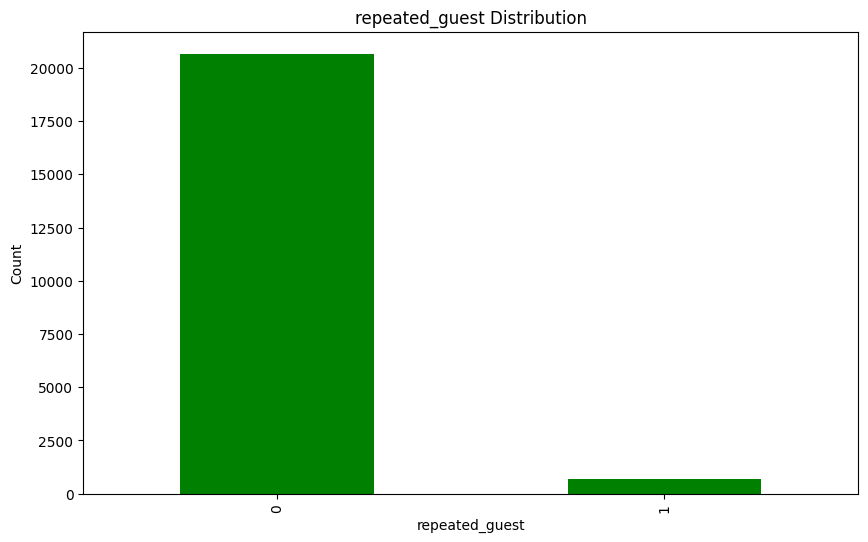

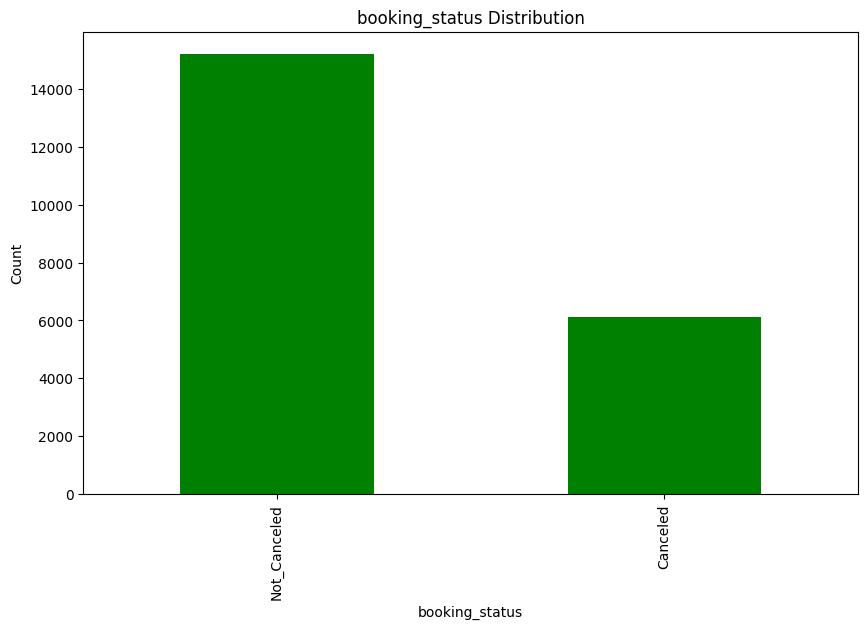

In [13]:
for cat_feature in cat_cols:
    plt.figure(figsize= (10, 6))
    data[cat_feature].value_counts().plot(kind='bar', color='green')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

### BIVARAITE ANALYSIS ###

In [14]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize = (15, num_rows*5))
    axes = axes.flatten()
    for i, column in enumerate(num_features):
        sns.boxplot(x =target, y = column, ax = axes[i], data = df, color="pink")
        axes[i].set_title(f"{column} VS {target}")
    plt.tight_layout()
    plt.show()

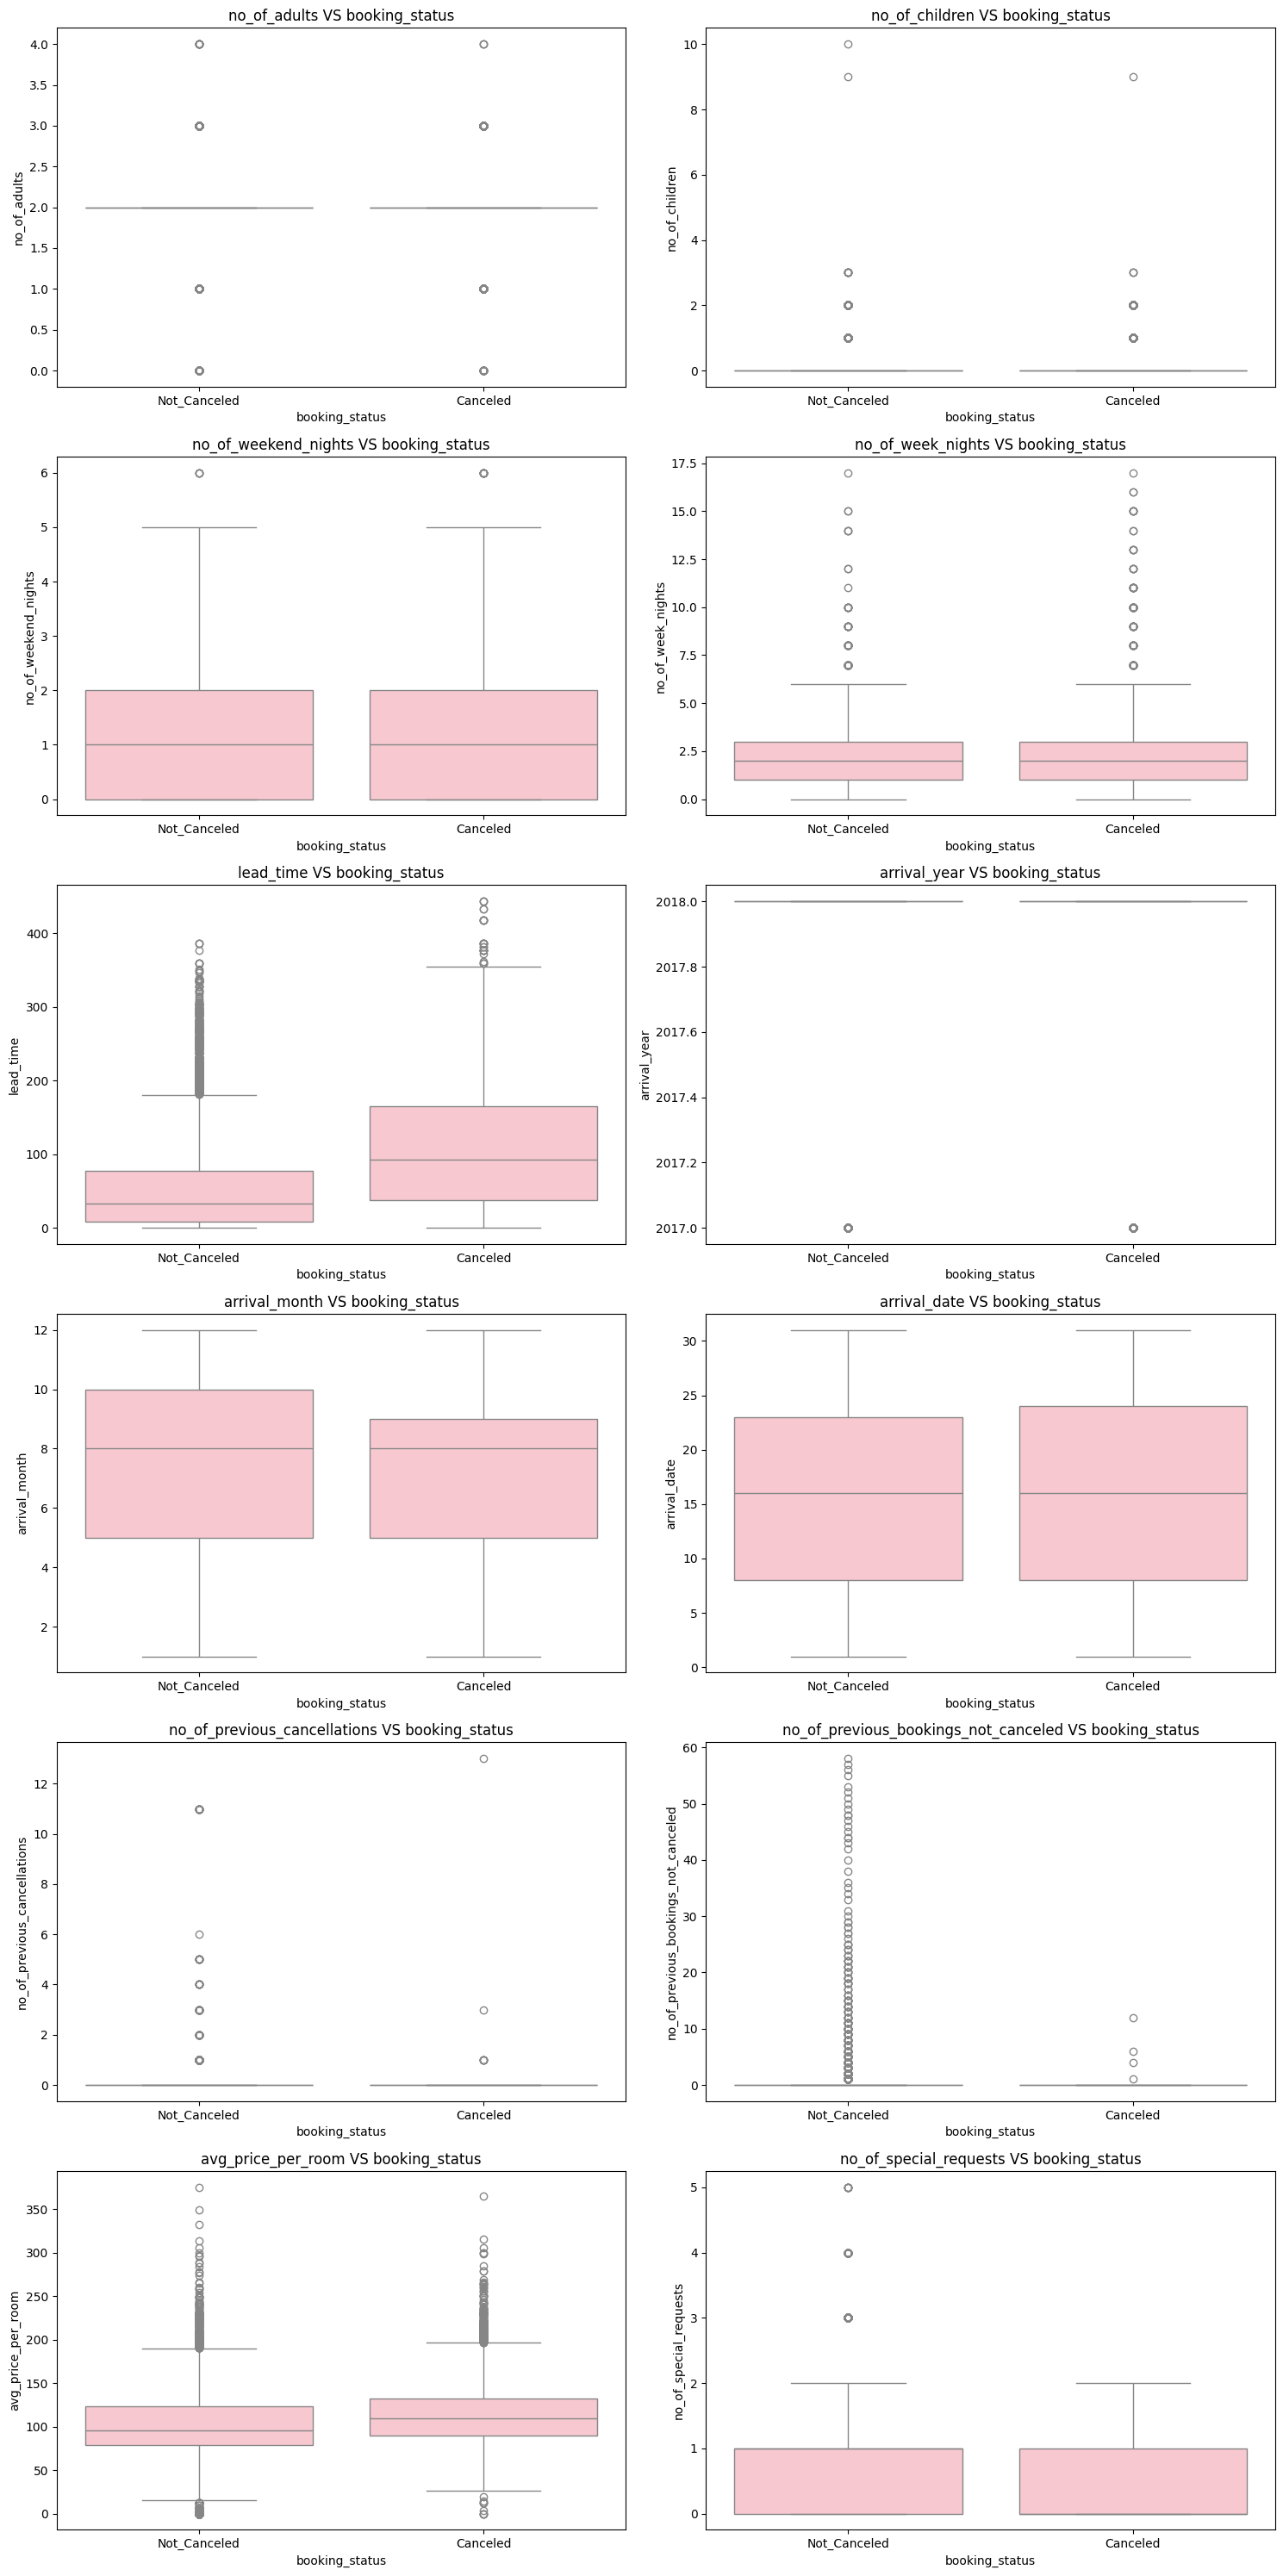

In [15]:
plot_bivariate_num(data, 'booking_status', num_cols)

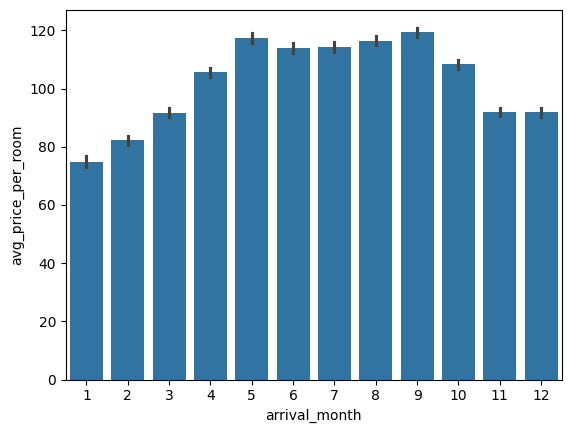

In [16]:
sns.barplot(x = 'arrival_month', y = 'avg_price_per_room', data = data)
plt.show()

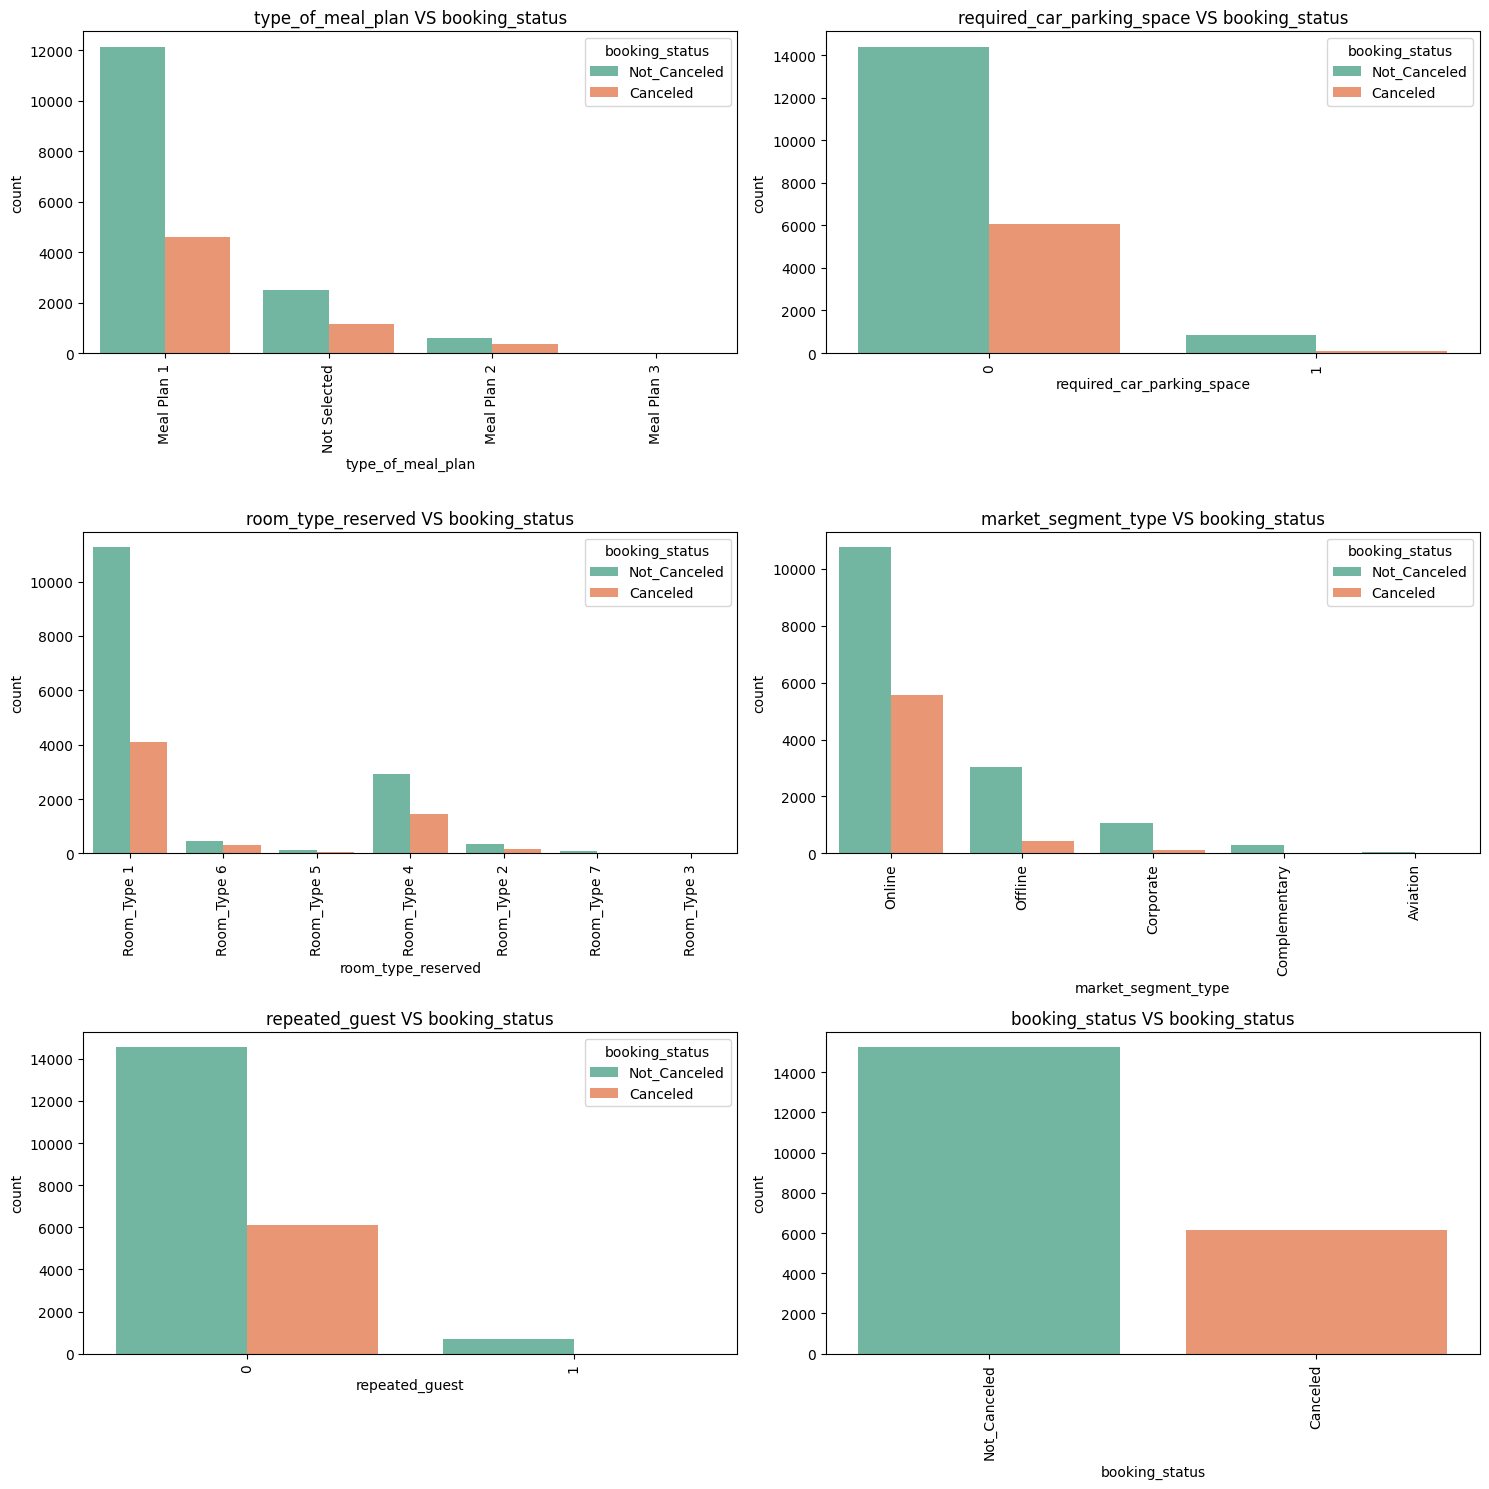

In [17]:
def plot_bivariate_cat(df, target, cat_feature):
    num_features = len(cat_feature)
    num_rows = (num_features + 1)//2
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()
    for i, feature in enumerate(cat_feature):
        sns.countplot(x = feature, hue = target, data = df, palette='Set2', ax = axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis = 'x', rotation=90)
    plt.tight_layout()
    plt.show()
plot_bivariate_cat(data, 'booking_status', cat_cols)

### Data Processing ###

In [18]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


### LABLE ENCODING

In [19]:
# Lable encoding
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder = LabelEncoder()
mappings = {}
for i in cat_cols:
    df[i] = label_encoder.fit_transform(df[i])
    mappings[i] = {label:code for label,code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}



In [21]:
mappings
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

### Multicollinearity

In [22]:
# !pip install statsmodels

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [24]:
x = add_constant(df)
vif_data = pd.DataFrame()

vif_data['featire'] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [25]:
vif_data
# if number is above 5 or larger it means there is a high multicolinearity but if that number is in the range for 1 to 2 we consider it low multicolsinerarity which is ideal
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

### Our data don't have any multicollinearity which is ideal for ml model

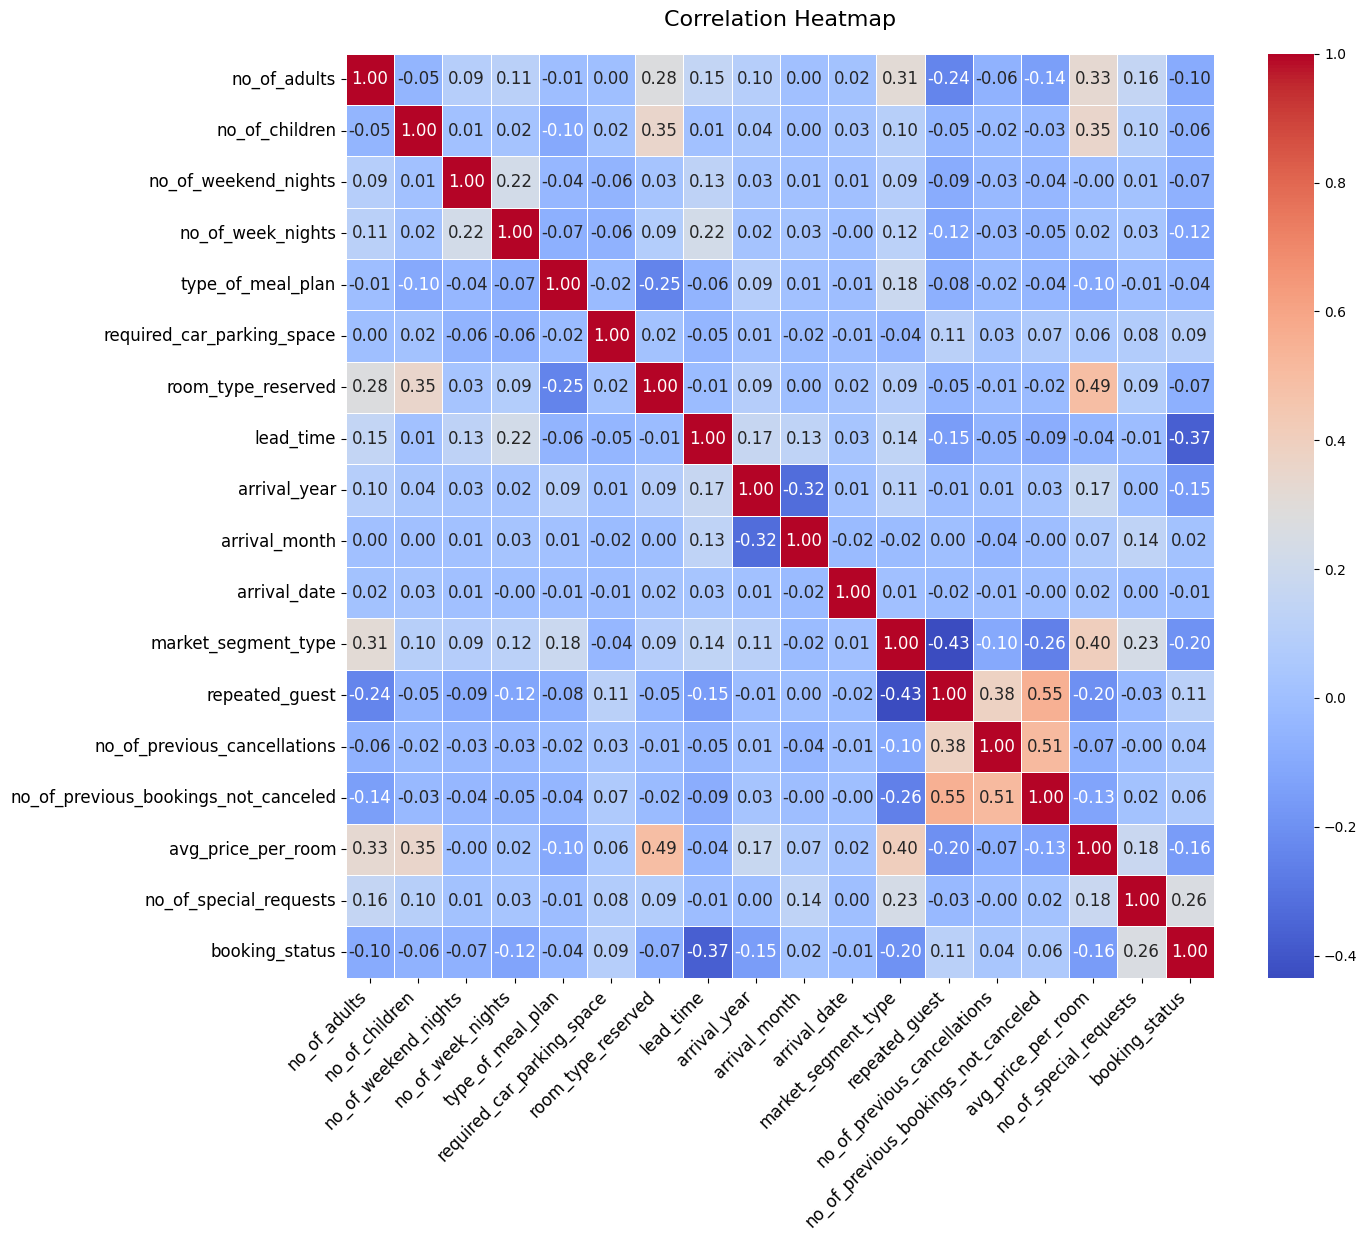

In [26]:
corr = df.corr()
plt.figure(figsize=(14, 12))  # make the heatmap bigger
sns.heatmap(
    corr,
    annot=True,              # show values
    fmt=".2f",               # 2 decimal places
    cmap="coolwarm",         # better color contrast
    linewidths=0.5,          
    annot_kws={"size": 12}   # font size of numbers inside cells
)

plt.xticks(fontsize=12, rotation=45, ha="right")  # bigger, rotated x labels
plt.yticks(fontsize=12, rotation=0)               # bigger y labels
plt.title("Correlation Heatmap", fontsize=16, pad=20)

plt.show()

### Skewness

In [27]:
skewness = df.skew()
skewness #no_of_previous_cancellations and no_of_previous_bookings_not_canceled are highly skewed
# df.info()

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [28]:
#Handel this using logtransformation
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

### Imbalanced Handeling

In [29]:
df["booking_status"].value_counts() # 1 -> not cancelled 0 -> cancelled

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [30]:
#cannot do under_sampeling very riskey and will reduce the number of rows by half hence we will do over_sampeling

#split data: input_col and output_col

x = df.drop(columns='booking_status')
y = df['booking_status']
x.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [31]:
# !pip install imbalanced-learn

In [32]:
y.value_counts() # before smote technique

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x,y)

In [34]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [35]:
balanced_df = pd.DataFrame(x_res, columns= x.columns)
balanced_df["booking_status"] = y_res

In [36]:
balanced_df.shape

(30462, 18)

In [37]:
df = balanced_df.copy()

### Feature Selection

In [38]:
len(df.columns)

18

In [39]:
from sklearn.ensemble import RandomForestClassifier
x = df.drop(columns= 'booking_status')
y = df['booking_status']

In [40]:
model = RandomForestClassifier(random_state=42)
model.fit(x,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
feature_importance = model.feature_importances_

In [42]:
feature_importance_df = pd.DataFrame({
    "feature": x.columns,
    "importance": feature_importance
})
top_features_impoertance_df = feature_importance_df.sort_values(by="importance", ascending= False)

In [43]:
top_features_impoertance_df = top_features_impoertance_df["feature"].head(10).values
top_10_df = df[top_features_impoertance_df.tolist() + ['booking_status']]

In [44]:
len(top_10_df.columns)

11

In [45]:
df = top_10_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30462 entries, 0 to 30461
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   lead_time               30462 non-null  int64  
 1   no_of_special_requests  30462 non-null  int64  
 2   avg_price_per_room      30462 non-null  float64
 3   arrival_month           30462 non-null  int64  
 4   arrival_date            30462 non-null  int64  
 5   market_segment_type     30462 non-null  int64  
 6   no_of_week_nights       30462 non-null  int64  
 7   no_of_weekend_nights    30462 non-null  int64  
 8   type_of_meal_plan       30462 non-null  int64  
 9   room_type_reserved      30462 non-null  int64  
 10  booking_status          30462 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 2.6 MB


### Model Selection

In [46]:
# !pip install xgboost lightgbm

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [48]:
x = df.drop(columns='booking_status')
y = df['booking_status']


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
classifers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Support vector classifier" : SVC(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGboost" : XGBClassifier(random_state = 42),
    "Adaboost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42)
}

In [50]:
matrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [51]:
for model_name, classifer in classifers.items():
    classifer.fit(x_train, y_train)
    y_pred = classifer.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    matrics["Model"].append(model_name)
    matrics["Accuracy"].append(accuracy)
    matrics["Precision"].append(precision)
    matrics["Recall"].append(recall)
    matrics["F1 Score"].append(f1)

[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [52]:
matrics_df = pd.DataFrame(matrics)
matrics_df.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.890202,0.893220,0.888274,0.890740
6,XGboost,0.872641,0.868573,0.880456,0.874474
8,LGBM,0.865255,0.850421,0.888925,0.869247
2,Gradient Boosting,0.835221,0.817846,0.865798,0.841139
7,Adaboost,0.804366,0.800769,0.814332,0.807494
4,KNN,0.779747,0.856142,0.676547,0.755822
1,Logistic Regression,0.775152,0.803571,0.732899,0.766610
5,Naive Bayes,0.773182,0.803161,0.728339,0.763922
3,Support vector classifier,0.720171,0.729412,0.706840,0.717949


### TRAIN OUR RANDOM FOREST MODEL

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [54]:
x = df.drop(columns='booking_status')
y = df['booking_status']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [55]:
rf = RandomForestClassifier(random_state=42)


In [56]:
params_dist = {
    'n_estimators': randint(100,500), 
    'max_depth': randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf': randint(1,5),
    'bootstrap': [True, False]
}

In [57]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions= params_dist,
    n_iter= 5,
    cv= 5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [58]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.9s
[CV]

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....0029759C2E870>, 'min_samples_leaf': <scipy.stats....0029759634C80>, 'min_samples_split': <scipy.stats....0029759635F10>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [59]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [60]:
best_rf_model = random_search.best_estimator_

In [61]:
y_pred = best_rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [62]:
print(accuracy)
print(precision)
print(recall)
print(f1)


0.8913507303462991
0.8891402714932126
0.8960912052117264
0.8926022063595068


### Save this model

In [63]:
import joblib

In [64]:
joblib.dump(best_rf_model, "random_forest.pkl")
loaded_model = joblib.load('random_forest.pkl')

In [67]:
x_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0


In [70]:
new_data = np.array([190,1,93.5,9,8,4,5,2,0,0]).reshape(1,-1)

In [71]:
predictions = loaded_model.predict(new_data)

In [72]:
predictions

array([1])